<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Contents" data-toc-modified-id="Contents-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Contents</a></span></li><li><span><a href="#Backends" data-toc-modified-id="Backends-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Backends</a></span></li><li><span><a href="#Making-plots" data-toc-modified-id="Making-plots-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Making plots</a></span><ul class="toc-item"><li><span><a href="#Simple-plotting" data-toc-modified-id="Simple-plotting-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Simple plotting</a></span></li><li><span><a href="#Object-oriented-plotting" data-toc-modified-id="Object-oriented-plotting-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Object-oriented plotting</a></span></li></ul></li><li><span><a href="#Configurations" data-toc-modified-id="Configurations-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Configurations</a></span></li><li><span><a href="#Stylesheets" data-toc-modified-id="Stylesheets-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Stylesheets</a></span></li><li><span><a href="#Pandas" data-toc-modified-id="Pandas-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Pandas</a></span></li><li><span><a href="#References" data-toc-modified-id="References-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Matplotlib

The oldest Python plotting package, and the default for most people most of the time.

## Contents

- [Backends](#Backends)
- [Making plots](#MakingPlots)
- [Configurations](#Configurations)
- [Stylesheets](#Stylesheets)
- [Pandas](#Pandas)
- [References](#Refs)

<a id='Backends'></a>   

## Backends

Matplotlib is designed to work on a variety of hardware, operating systems and runtime environments. Within Jupyter notebooks the useful ones are probably `inline` for non-interactive plots and `notebook` for something that responds to the mouse.

Some IPython magic will display the options:

In [5]:
%matplotlib -l

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt4', 'qt5', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


Most notebooks will start by specifying a backend and importing pyplot. Only have one of the `%matplotlib` magic lines active, and if you change between them you will almost certainly have to restart the kernel.

In [6]:
%matplotlib inline
# %matplotlib notebook
import matplotlib.pyplot as plt

What backend are we currently running?

In [7]:
plt.get_backend()

'module://ipykernel.pylab.backend_inline'

___%matplotlib widget___ : This seemed promising but my early experiments didn't go well. It needs to have the `ipympl` package installed, which worked (`conda install ipympl`) but also changed some other packages. After this there were various odd problems with kernels failing to start in notebooks and I quickly removed the package.

For the future, it might be interesting to try again in JupyterLab rather than notebooks, and do it in a sandboxed environment rather than risking the default conda environment.

docs: https://github.com/matplotlib/jupyter-matplotlib

<a id='MakingPlots'></a>   

## Making plots

Choices, choices...

Matplotlib even has two different APIs, which can be confusing:
- the older Matlab-style interface, which is state-based; recognizable by `plt.plot()` commands
- the more flexible object-oriented interface; recognizable by `ax.plot()` commands

We will need some data for plotting. The file will be loaded as an ndarray with named columns. The first 5 are filter colors.

In [8]:
import numpy as np
data = np.load('sdss_colors.npy')

In [9]:
display(data.dtype.names, data[0], data.shape)

('u', 'g', 'r', 'i', 'z', 'specClass', 'redshift', 'redshift_err')

(18.06726, 17.92133, 17.76799, 17.83525, 17.74435, 'QSO', 0.9460756, 0.00026885)

(1000,)

In [10]:
# Extract colors and spectral class
ug = data['u'] - data['g']
gr = data['g'] - data['r']
ri = data['r'] - data['i']
rs = data['redshift']
spec_class = data['specClass']

galaxies = (spec_class == 'GALAXY')
qsos = (spec_class == 'QSO')

### Simple plotting

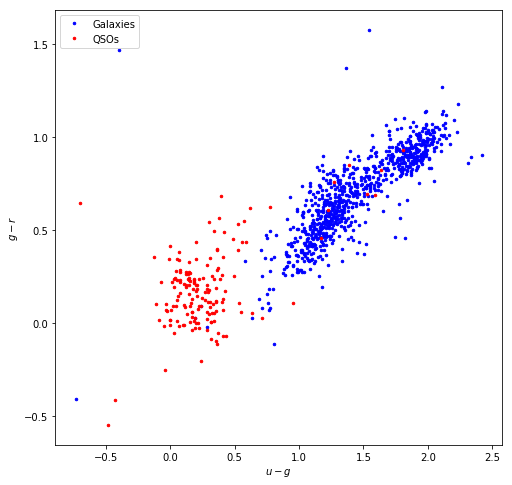

In [11]:
fig = plt.figure(figsize=(8,8))
plt.plot(ug[galaxies], gr[galaxies], '.', ms=5, c='b', label='Galaxies')
plt.plot(ug[qsos], gr[qsos], '.', ms=5, c='r', label='QSOs')
plt.legend(loc=2)
plt.xlabel('$u-g$')
plt.ylabel('$g-r$');

### Object-oriented plotting

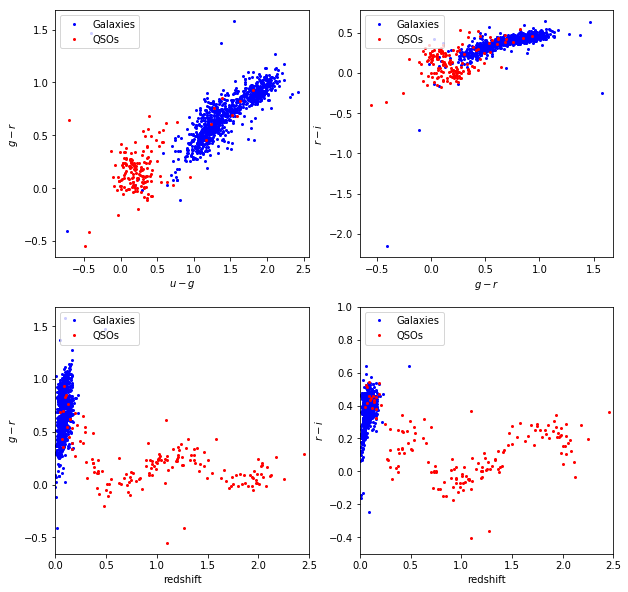

In [12]:
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(221)
ax1.plot(ug[galaxies], gr[galaxies], '.', ms=4, c='b', label='Galaxies')
ax1.plot(ug[qsos], gr[qsos], '.', ms=4, c='r', label='QSOs')
ax1.legend(loc=2)
ax1.set_xlabel('$u-g$')
ax1.set_ylabel('$g-r$')

ax2 = fig.add_subplot(222)
ax2.plot(gr[galaxies], ri[galaxies], '.', ms=4, c='b', label='Galaxies')
ax2.plot(gr[qsos], ri[qsos], '.', ms=4, c='r', label='QSOs')
ax2.legend(loc=2)
ax2.set_xlabel('$g-r$')
ax2.set_ylabel('$r-i$')

ax3 = fig.add_subplot(223)
ax3.plot(rs[galaxies], gr[galaxies], '.', ms=4, c='b', label='Galaxies')
ax3.plot(rs[qsos], gr[qsos], '.', ms=4, c='r', label='QSOs')
ax3.legend(loc=2)
ax3.set_xlabel('redshift')
ax3.set_ylabel('$g-r$')
ax3.set_xlim(0, 2.5)

ax4 = fig.add_subplot(224)
ax4.plot(rs[galaxies], ri[galaxies], '.', ms=4, c='b', label='Galaxies')
ax4.plot(rs[qsos], ri[qsos], '.', ms=4, c='r', label='QSOs')
ax4.legend(loc=2)
ax4.set_xlabel('redshift')
ax4.set_ylabel('$r-i$')
ax4.set_xlim(0, 2.5)
ax4.set_ylim(-0.5, 1);

Some points to note :
- Methods are now called on the axes, not on plt - even if there is only one "subplot"
- Most method names are the same in both interfaces but a few common ones change by adding `set_` in front
    - `xlabel()`, `ylabel()`
    - `xlim()`, `ylim()`
    - `title()`
- This doesn't begin to scratch the surface of the options. It would be interesting to know what fraction of StackExchange is devoted to questions about Matplotlib options; surely non-trivial.

<a id='Configurations'></a>   

## Configurations

Pretty much every part of a plot can be customized individually, but this gets tedious very fast.

It is possible to change the defaults through `rcParams` and the `plt.rc()` function, either individually or by saving a set of preferred values in a `.matplotlibrc` file.

<a id='Stylesheets'></a>   

## Stylesheets

A later addition than rcParams, stylesheets provide a set of default styles plus the ability to create your own in `.mplstyle` files.

What styles do we currently have available?

In [13]:
styles = sorted(plt.style.available)
styles

['Solarize_Light2',
 '_classic_test',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

Calling `plt.style.use()` changes the style for the whole notebook. To explore a variety of styles we want a more limited context, as below. This is the same plot used previously, but with all the size and color specifications removed so we can see the style's default behavior. They are strikingly varied and very easy to use.

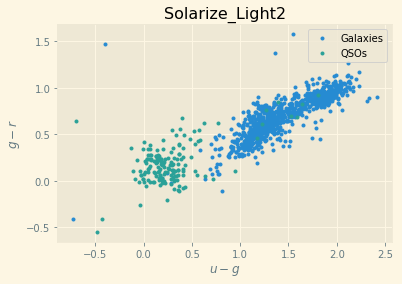

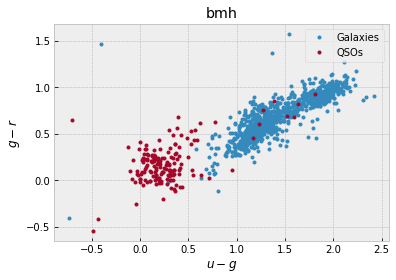

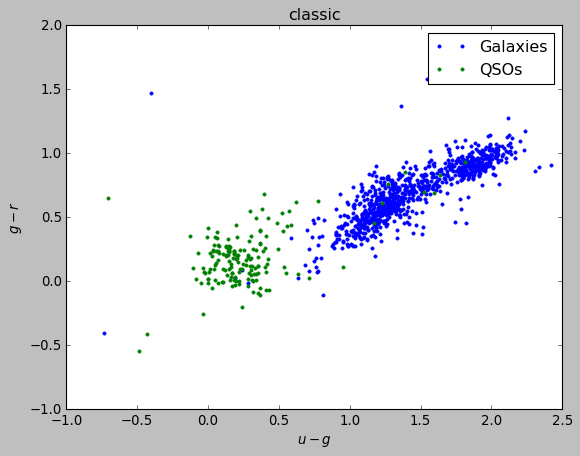

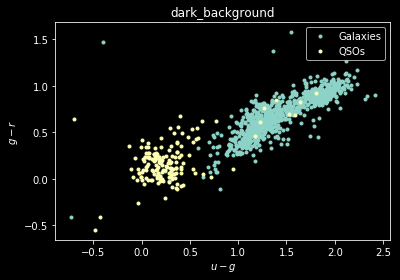

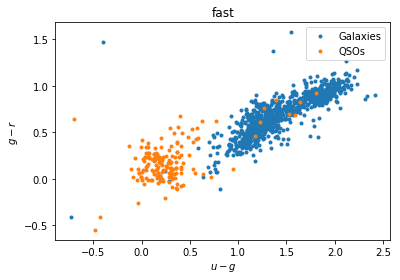

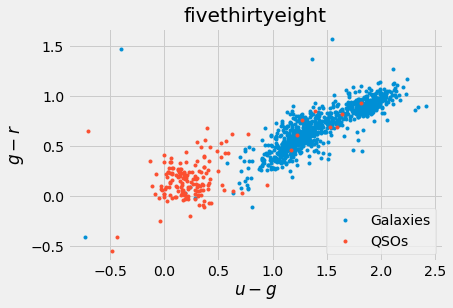

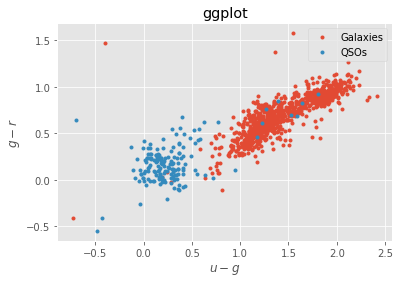

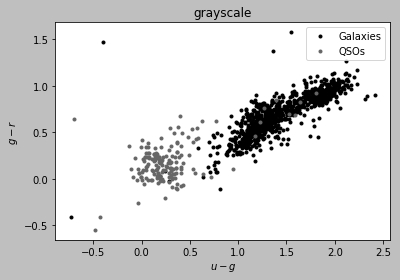

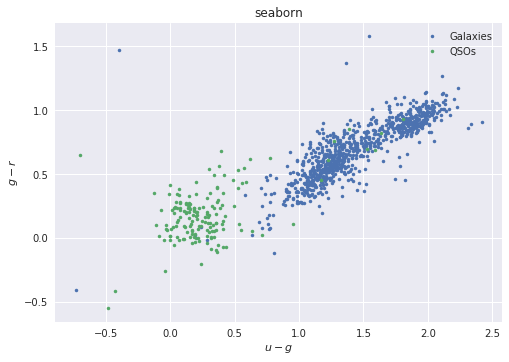

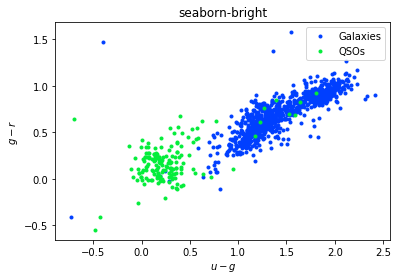

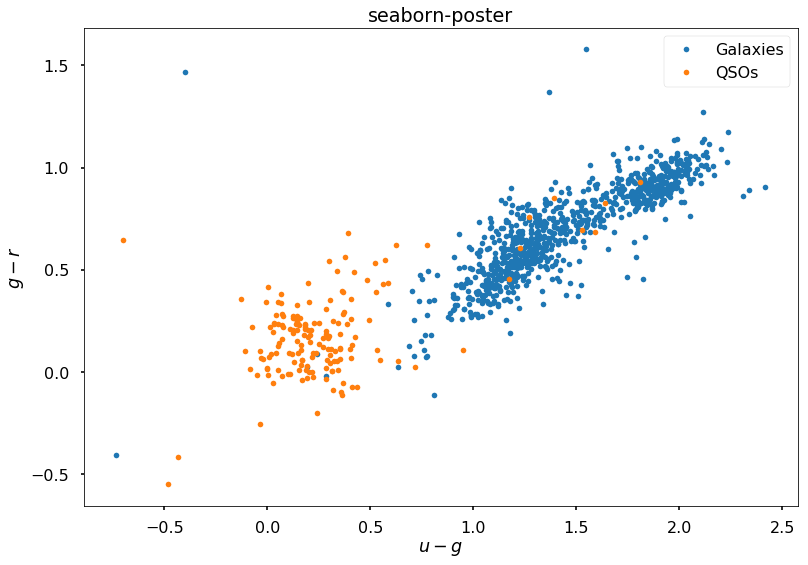

In [14]:
styles_subset = ['Solarize_Light2',
                'bmh',
                'classic',
                'dark_background', # for lecture slides
                'fast',
                'fivethirtyeight', # Nate Silver's website
                'ggplot',          # as used by R programmers
                'grayscale',       # for (cheap) journal articles
                'seaborn',         # just the style, not the API
                'seaborn-bright',
                'seaborn-poster']  # big and easy to read
for style in styles_subset:
    with plt.style.context(style):
        fig = plt.figure() 
        plt.plot(ug[galaxies], gr[galaxies], '.', label='Galaxies')
        plt.plot(ug[qsos], gr[qsos], '.', label='QSOs')
        plt.legend()
        plt.xlabel('$u-g$')
        plt.ylabel('$g-r$')
        plt.title(style);

<a id='Pandas'></a>   

## Pandas

Matplotlib isn't really designed to use pandas, but pandas (being newer in concept) allow you to call a `plot()` method on the dataframe. This then uses Pyplot in the background.

This seems to be a quick-and-dirty shortcut, not intended for anything sophisticated. By the time you're working with pandas, it may be worth considering Seaborn as an alternative, or something even newer such as Altair.

In [15]:
import pandas as pd
data = pd.DataFrame(data)
data = pd.DataFrame(np.load('sdss_colors.npy'))
data['u-g'] = data['u'] - data['g']
data['g-r'] = data['g'] - data['r']
data['r-i'] = data['r'] - data['i']

galaxies = data.loc[data['specClass'] == 'GALAXY']
qsos = data.loc[data['specClass'] == 'QSO']

data[:3]

,u,g,r,i,z,specClass,redshift,redshift_err,u-g,g-r,r-i
0,18.06726,17.92133,17.76799,17.83525,17.74435,QSO,0.946076,0.000269,0.14593,0.15334,-0.06726
1,19.46527,17.84728,17.00071,16.56581,16.20629,GALAXY,0.078311,0.000021,1.61799,0.84657,0.43490
2,18.65488,17.34237,16.79778,16.49659,16.24572,GALAXY,0.032940,0.000019,1.31251,0.54459,0.30119


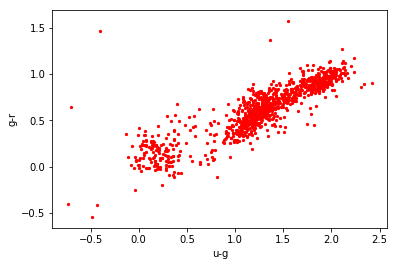

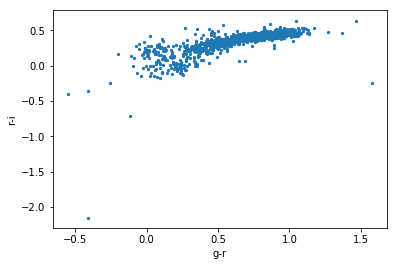

In [16]:
data.plot.scatter('u-g', 'g-r', s=5 , c='red') 
data.plot.scatter('g-r', 'r-i', s=5);

<a id='Refs'></a>   

## References

- VanderPlas, "Python Data Science Handbook", chapter 4

This is a must-read for anyone wanting to dig deeper into Matplotlib. The printed version is relatively affordable, and the entire text is also freely available in Jupyter notebook format at https://github.com/jakevdp/PythonDataScienceHandbook and HTML format at https://jakevdp.github.io/PythonDataScienceHandbook/